시계열 데이터 다루기 _ 사이렌케어

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [21]:
act = pd.read_csv('OTg6QzA_activities.csv')
act.shape

(66281, 4)

거리와 속도를 산출하려면 해당 시간의 데이터와 그 바로 직전 시간의 데이터가 필요하다 (계산을 위해)   
그렇기 때문에 새롭게 `p_z`와 `p_y`, `p_z` 열을 추가한다.   

이때 shift()를 이용해 직전 시간의 데이터를 불러온다.   

In [22]:
act['p_timestamp'] = act['timestamp'].shift(1)
act['p_x'] = act['X'].shift(1)
act['p_y'] = act['Y'].shift(1)
act['p_z'] = act['Z'].shift(1)

act.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
0,2022-01-01 00:01:40.363,33,76,56,None,NaN,NaN,NaN
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0


직전 시간의 데이터를 생성했으니 제일 첫 번째 행은 NaN 값이 포함될 수밖에 없다.   
그렇기에 `dropna()` 함수를 통해 NaN 값이 있는 행을 삭제한다.

In [23]:
act = act.dropna()

act.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0


In [24]:
# 거리 계산 코드
def calc_dist(df):
    x_d = df['X'] - df['p_x']
    y_d = df['Y'] - df['p_y']
    z_d = df['X'] - df['p_z']

    return np.sqrt(x_d**2 + y_d**2 + z_d**2)

In [25]:
act.loc[:,'dist'] = act.loc[:, ['X','p_x', 'Y', 'p_y', 'Z', 'p_z']].apply(calc_dist, axis=1)
act.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,24.617067
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,32.341923
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,43.046487
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,27.874720
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,39.102430


In [26]:
# 시간 계산 코드
def calc_timediff(df):
  d1 = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
  d2 = datetime.strptime(df['p_timestamp'], "%Y-%m-%d %H:%M:%S.%f")
  return (d1 - d2).total_seconds()

In [27]:
act['d_time'] = act[["timestamp","p_timestamp"]].apply(calc_timediff, axis=1)
act.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,24.617067,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,32.341923,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,43.046487,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,27.874720,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,39.102430,12.901


In [28]:
# 속도 계산 코드
def calc_act(df):
  if df['d_time'] != 0:
    return np.abs(df['dist'] / df['d_time'])
  else:
    # 정상적인 수가 아님.
    return 0

In [29]:
act['calc_act'] = act[["dist", "d_time"]].apply(calc_act, axis=1)
act.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,dist,d_time,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,24.617067,2.598,9.475392
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,32.341923,2.601,12.434419
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,43.046487,2.601,16.549976
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,27.874720,20.701,1.346540
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,39.102430,12.901,3.030961


<Axes: title={'center': 'calculation of activity'}, xlabel='time series', ylabel='activity [cm/sec]'>

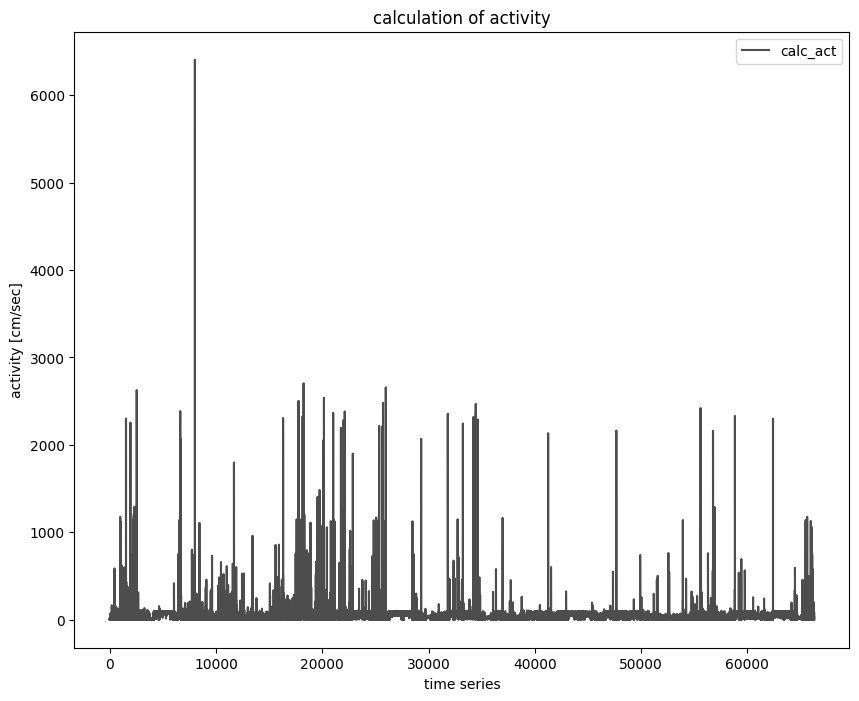

In [30]:
# 그래프 사이즈 설정, (가로, 세로 길이)
plt.rcParams['figure.figsize'] = [10, 8]
act.plot(y="calc_act", color="0.3", title="calculation of activity", ylabel="activity [cm/sec]", xlabel="time series")

대부분의 움직임이 50cm 이하인 것을 알 수 있다